In [19]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn.preprocessing import MinMaxScaler
from reg_linear_regressor_multi import RegularizedLinearReg_SquaredLoss
import matplotlib.pyplot as plt
import plot_utils, utils

X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)


X_train_1 = np.ones((len(X_train),len(X_train[0])+1));
X_train_1 = np.ones((len(X_train),len(X_train[0])+1));
X_train_1[:,1:len(X_train_1)] = X_train;

X_val_1 = np.ones((len(X_val),len(X_val[0])+1));
X_val_1 = np.ones((len(X_val),len(X_val[0])+1));
X_val_1[:,1:len(X_val_1)] = X_val;

X_test_1 = np.ones((len(X_test),len(X_test[0])+1));
X_test_1 = np.ones((len(X_test),len(X_test[0])+1));
X_test_1[:,1:len(X_test_1)] = X_test;


scaler = MinMaxScaler()
scale_X_train = scaler.fit_transform(X_train_1);
scale_X_train[:,0] = 1;
scale_X_test = scaler.fit_transform(X_test_1);
scale_X_test[:,0] = 1;
scale_X_val = scaler.fit_transform(X_val_1);
scale_X_val[:,0] = 1;


regression = RegularizedLinearReg_SquaredLoss()
theta = regression.train(X_train_1, y_train, 0, num_iters=10000)

train_error = regression.loss(theta, X_train_1, y_train, 0)
val_error = regression.loss(theta, X_val_1, y_val, 0)
test_error = regression.loss(theta, X_test_1, y_test, 0)

print("Training error: " + str(train_error.round(3)))
print("Validation error: " + str(val_error.round(3)))
print("Test error: " + str(test_error.round(3)))

Optimization terminated successfully.
         Current function value: 10.567052
         Iterations: 41
         Function evaluations: 48
         Gradient evaluations: 48
Training error: 10.567
Validation error: 11.775
Test error: 12.876


Optimization terminated successfully.
         Current function value: 10.567052
         Iterations: 86
         Function evaluations: 87
         Gradient evaluations: 87
Optimization terminated successfully.
         Current function value: 10.569499
         Iterations: 86
         Function evaluations: 87
         Gradient evaluations: 87
Optimization terminated successfully.
         Current function value: 10.574391
         Iterations: 86
         Function evaluations: 87
         Gradient evaluations: 87
Optimization terminated successfully.
         Current function value: 10.591480
         Iterations: 86
         Function evaluations: 87
         Gradient evaluations: 87
Optimization terminated successfully.
         Current function value: 10.640045
         Iterations: 85
         Function evaluations: 86
         Gradient evaluations: 86
Optimization terminated successfully.
         Current function value: 10.807104
         Iterations: 85
         Function evaluations:

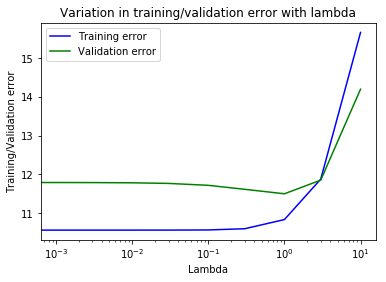

[11.79344739 11.79262428 11.79098413 11.78530681 11.7696009  11.72032192
 11.61789177 11.50273559 11.85448992 14.19626863]
1


In [14]:
###### Runing different lambda values ######

reg_vec, train_error, val_error = utils.validation_curve(scale_X_train,y_train,scale_X_val,y_val)
plot_utils.plot_lambda_selection(reg_vec,train_error,val_error)
plt.show()
print(val_error)
print(reg_vec[np.argmin(val_error)])

In [15]:
from utils import feature_normalize
import sklearn
from sklearn.preprocessing import PolynomialFeatures

    
p = 2
poly = sklearn.preprocessing.PolynomialFeatures(degree=p,include_bias=False)
X_poly = poly.fit_transform(X_train)
X_poly, mu, sigma = utils.feature_normalize(X_poly)

# add a column of ones to X_poly

XX_poly = np.vstack([np.ones((X_poly.shape[0],)),X_poly.T]).T

# map Xtest and Xval into the same polynomial features

X_poly_test = poly.fit_transform(X_test)
X_poly_val = poly.fit_transform(X_val)

# normalize these two sets with the same mu and sigma

X_poly_test = (X_poly_test - mu) / sigma
X_poly_val = (X_poly_val - mu) / sigma

# add a column of ones to both X_poly_test and X_poly_val
XX_poly_test = np.vstack([np.ones((X_poly_test.shape[0],)),X_poly_test.T]).T
XX_poly_val = np.vstack([np.ones((X_poly_val.shape[0],)),X_poly_val.T]).T




Optimization terminated successfully.
         Current function value: 1.695449
         Iterations: 943
         Function evaluations: 947
         Gradient evaluations: 947
Optimization terminated successfully.
         Current function value: 1.736492
         Iterations: 711
         Function evaluations: 715
         Gradient evaluations: 715
Optimization terminated successfully.
         Current function value: 1.790810
         Iterations: 636
         Function evaluations: 640
         Gradient evaluations: 640
Optimization terminated successfully.
         Current function value: 1.918542
         Iterations: 497
         Function evaluations: 501
         Gradient evaluations: 501
Optimization terminated successfully.
         Current function value: 2.135598
         Iterations: 382
         Function evaluations: 386
         Gradient evaluations: 386
Optimization terminated successfully.
         Current function value: 2.509778
         Iterations: 270
         Function ev

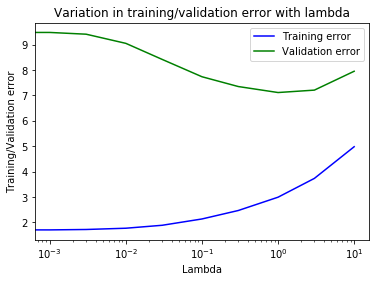

[9.37119672 9.47616991 9.40729055 9.04601976 8.41454612 7.73241556
 7.34700496 7.11094021 7.20590781 7.94874792]
1
Optimization terminated successfully.
         Current function value: 3.805723
         Iterations: 124
         Function evaluations: 128
         Gradient evaluations: 128
6.193396024852395


In [17]:
###### Runing different lambda values ######

reg_vec, train_error, val_error = utils.validation_curve(XX_poly,y_train,XX_poly_val,y_val)
plot_utils.plot_lambda_selection(reg_vec,train_error,val_error)
plt.show()
print(val_error)
print(reg_vec[np.argmin(val_error)])
theta = regression.train(XX_poly, y_train, 1, num_iters=10000)
test_error = regression.loss(theta, XX_poly_test, y_test, 0)
print(test_error)

Optimization terminated successfully.
         Current function value: 0.003332
         Iterations: 2190
         Function evaluations: 2200
         Gradient evaluations: 2200
Optimization terminated successfully.
         Current function value: 0.340732
         Iterations: 1087
         Function evaluations: 1095
         Gradient evaluations: 1095
Optimization terminated successfully.
         Current function value: 0.511091
         Iterations: 870
         Function evaluations: 878
         Gradient evaluations: 878
Optimization terminated successfully.
         Current function value: 0.733071
         Iterations: 637
         Function evaluations: 645
         Gradient evaluations: 645
Optimization terminated successfully.
         Current function value: 0.954465
         Iterations: 469
         Function evaluations: 477
         Gradient evaluations: 477
Optimization terminated successfully.
         Current function value: 1.224971
         Iterations: 319
         Funct

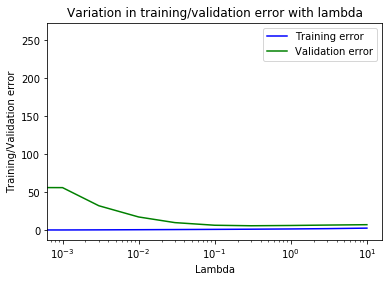

[260.57564585  56.01337366  32.11965505  17.33685227   9.8837789
   6.42509262   5.75042894   6.11176762   6.6522461    7.16102025]
0.3
Optimization terminated successfully.
         Current function value: 1.535728
         Iterations: 219
         Function evaluations: 227
         Gradient evaluations: 227
6.944319487411757


In [20]:
p = 3
poly = sklearn.preprocessing.PolynomialFeatures(degree=p,include_bias=False)
X_poly = poly.fit_transform(X_train)
X_poly, mu, sigma = utils.feature_normalize(X_poly)

# add a column of ones to X_poly

XX_poly = np.vstack([np.ones((X_poly.shape[0],)),X_poly.T]).T

# map Xtest and Xval into the same polynomial features

X_poly_test = poly.fit_transform(X_test)
X_poly_val = poly.fit_transform(X_val)

# normalize these two sets with the same mu and sigma

X_poly_test = (X_poly_test - mu) / sigma
X_poly_val = (X_poly_val - mu) / sigma

# add a column of ones to both X_poly_test and X_poly_val
XX_poly_test = np.vstack([np.ones((X_poly_test.shape[0],)),X_poly_test.T]).T
XX_poly_val = np.vstack([np.ones((X_poly_val.shape[0],)),X_poly_val.T]).T

###### Runing different lambda values ######

reg_vec, train_error, val_error = utils.validation_curve(XX_poly,y_train,XX_poly_val,y_val)
plot_utils.plot_lambda_selection(reg_vec,train_error,val_error)
plt.show()
print(val_error)
print(reg_vec[np.argmin(val_error)])
theta = regression.train(XX_poly, y_train, .3, num_iters=10000)
test_error = regression.loss(theta, XX_poly_test, y_test, 0)
print(test_error)